# Sprint 9. Anàlisi de sentiment i textos


## Tasca M9 T01

*Sentiment and texts analysis exercises.*

### Exercise 1

*Take any English text you want, and calculate the frequency of its words.*

In [1]:
import requests

url = 'https://www.runnersworld.com/runners-stories/a20810747/the-best-types-of-dogs-for-runners/'
res = requests.get(url)
html_page = res.content

In [2]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_page, 'html.parser')

#### Finding the text

In [3]:
text = soup.find_all(text=True)

In [4]:
set([t.parent.name for t in text])

{'[document]',
 'a',
 'div',
 'em',
 'h1',
 'h2',
 'h5',
 'h6',
 'p',
 'script',
 'span',
 'strong',
 'style',
 'time',
 'title',
 'u'}

#### Extracting the valuable text

In [5]:
output = ''
blacklist = [
    '[document]',

   'noscript',
    'header',
    'html',
    'meta',
    'head', 
    'input',
    'script',
    'style',
    'time',
    'span',
    'title',
    'footer',
]

for t in text:
    if t.parent.name not in blacklist:
        output += '{} '.format(t)

In [10]:
print(output)

Runner’s World+ Membership Perks Meet RW+ Members Download Training Plans Find a Deal Get Expert Advice Exclusive Stories Shop Editors’ Picks Training Plans Workouts RW Apparel Sale Subscribe Runner’s World 2022 Calendar Training Marathon Training Half Marathon Training Training Plans Strength Training Cross Training Workouts Health & Injuries Pronation IT Band Syndrome Runner's Knee Shin Splints Plantar Fasciitis Nutrition & Weight Loss Daily Calories Calculator BMI Calculator Running Shoes & Gear All Gear & Accessories All Shoes Best Running Shoes Compression Gear Minimalist Running Shoes Shoe Guide Best Walking Shoes What to Wear Tool Best Wireless Earbuds Best Treadmills GPS Running Watches Socks for Runners Winter Running Hats Best Jogging Strollers High Impact Sports Bras Running Headlamps Beginner Running Tips Kids Running Start Running Advanced Interval Running Tempo Run Barefoot Running Tapering Tools Running Pace Calculator Race Times Predictor Age Grade Calculator Pace Conve

In [22]:
!pip install nltk

#### Sentence Tokenization

In [6]:
#Loading NLTK
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

tokenized_text=sent_tokenize(output)
print(tokenized_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\usuari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


["Runner’s World+ Membership Perks Meet RW+ Members Download Training Plans Find a Deal Get Expert Advice Exclusive Stories Shop Editors’ Picks Training Plans Workouts RW Apparel Sale Subscribe Runner’s World 2022 Calendar Training Marathon Training Half Marathon Training Training Plans Strength Training Cross Training Workouts Health & Injuries Pronation IT Band Syndrome Runner's Knee Shin Splints Plantar Fasciitis Nutrition & Weight Loss Daily Calories Calculator BMI Calculator Running Shoes & Gear All Gear & Accessories All Shoes Best Running Shoes Compression Gear Minimalist Running Shoes Shoe Guide Best Walking Shoes What to Wear Tool Best Wireless Earbuds Best Treadmills GPS Running Watches Socks for Runners Winter Running Hats Best Jogging Strollers High Impact Sports Bras Running Headlamps Beginner Running Tips Kids Running Start Running Advanced Interval Running Tempo Run Barefoot Running Tapering Tools Running Pace Calculator Race Times Predictor Age Grade Calculator Pace Con

#### Word Tokenization

In [7]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(output)
print(tokenized_word)

['Runner', '’', 's', 'World+', 'Membership', 'Perks', 'Meet', 'RW+', 'Members', 'Download', 'Training', 'Plans', 'Find', 'a', 'Deal', 'Get', 'Expert', 'Advice', 'Exclusive', 'Stories', 'Shop', 'Editors', '’', 'Picks', 'Training', 'Plans', 'Workouts', 'RW', 'Apparel', 'Sale', 'Subscribe', 'Runner', '’', 's', 'World', '2022', 'Calendar', 'Training', 'Marathon', 'Training', 'Half', 'Marathon', 'Training', 'Training', 'Plans', 'Strength', 'Training', 'Cross', 'Training', 'Workouts', 'Health', '&', 'Injuries', 'Pronation', 'IT', 'Band', 'Syndrome', 'Runner', "'s", 'Knee', 'Shin', 'Splints', 'Plantar', 'Fasciitis', 'Nutrition', '&', 'Weight', 'Loss', 'Daily', 'Calories', 'Calculator', 'BMI', 'Calculator', 'Running', 'Shoes', '&', 'Gear', 'All', 'Gear', '&', 'Accessories', 'All', 'Shoes', 'Best', 'Running', 'Shoes', 'Compression', 'Gear', 'Minimalist', 'Running', 'Shoes', 'Shoe', 'Guide', 'Best', 'Walking', 'Shoes', 'What', 'to', 'Wear', 'Tool', 'Best', 'Wireless', 'Earbuds', 'Best', 'Treadmi

#### Frequency Distribution

In [8]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 979 samples and 2869 outcomes>


In [9]:
fdist.most_common(10)

[(',', 136),
 ('.', 93),
 ('the', 82),
 ('a', 62),
 ('and', 56),
 ('to', 52),
 ('for', 47),
 ('of', 35),
 ('Best', 31),
 ('in', 31)]

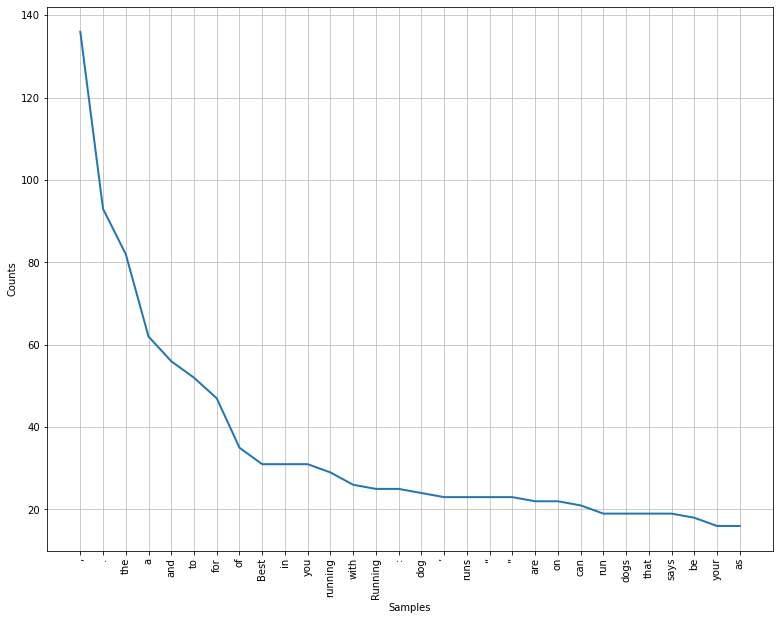

In [16]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.rcParams['figure.figsize'] = [13, 10]
plt.show()

### Exercise 2

*Remove the stopwords and perform stemming on your dataset.*

In [15]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'of', "wasn't", 'some', 'd', 'isn', "shan't", 'needn', 'who', 'ma', 'such', 'won', 'it', "you're", 'were', 'you', 'on', 'there', 'our', 'my', 'mightn', 'weren', "mustn't", 'which', "wouldn't", 'how', 'did', 'few', 'about', 'doesn', 'myself', 'your', 'his', "doesn't", 'for', 'they', 'that', 'and', "you'd", "haven't", "hasn't", 'but', 'in', 'ain', 'at', 'shan', 'been', 'mustn', 'while', 'me', 'ours', 'after', 'their', 'nor', 'can', 'yours', 'hasn', 'more', 'its', 'be', 'no', 'other', 'he', 'over', 'y', 'o', 'up', 'ourselves', 'herself', 'by', 'again', 're', "it's", 'during', 'are', 'those', 'into', 've', 'below', 'too', 'm', 'theirs', 'only', 'themselves', 'as', 'being', 'hers', 'same', 'so', 'wouldn', 'she', 'yourself', "don't", "shouldn't", 'an', 'off', 'was', "you'll", 'before', "should've", 'why', 'once', 'yourselves', 'don', 'the', 'should', 'her', 'hadn', 'doing', 'has', 'shouldn', "isn't", "you've", 'this', 'does', 'didn', 'him', 't', 'or', 'them', 'from', 'just', "that'll", 'eac

#### Removing Stopwords

In [16]:
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_word)

Tokenized Sentence: ['Runner', '’', 's', 'World+', 'Membership', 'Perks', 'Meet', 'RW+', 'Members', 'Download', 'Training', 'Plans', 'Find', 'a', 'Deal', 'Get', 'Expert', 'Advice', 'Exclusive', 'Stories', 'Shop', 'Editors', '’', 'Picks', 'Training', 'Plans', 'Workouts', 'RW', 'Apparel', 'Sale', 'Subscribe', 'Runner', '’', 's', 'World', '2022', 'Calendar', 'Training', 'Marathon', 'Training', 'Half', 'Marathon', 'Training', 'Training', 'Plans', 'Strength', 'Training', 'Cross', 'Training', 'Workouts', 'Health', '&', 'Injuries', 'Pronation', 'IT', 'Band', 'Syndrome', 'Runner', "'s", 'Knee', 'Shin', 'Splints', 'Plantar', 'Fasciitis', 'Nutrition', '&', 'Weight', 'Loss', 'Daily', 'Calories', 'Calculator', 'BMI', 'Calculator', 'Running', 'Shoes', '&', 'Gear', 'All', 'Gear', '&', 'Accessories', 'All', 'Shoes', 'Best', 'Running', 'Shoes', 'Compression', 'Gear', 'Minimalist', 'Running', 'Shoes', 'Shoe', 'Guide', 'Best', 'Walking', 'Shoes', 'What', 'to', 'Wear', 'Tool', 'Best', 'Wireless', 'Earbud

In [24]:
print("Filterd Sentence:",filtered_sent)

Filterd Sentence: ['Runner', '’', 'World+', 'Membership', 'Perks', 'Meet', 'RW+', 'Members', 'Download', 'Training', 'Plans', 'Find', 'Deal', 'Get', 'Expert', 'Advice', 'Exclusive', 'Stories', 'Shop', 'Editors', '’', 'Picks', 'Training', 'Plans', 'Workouts', 'RW', 'Apparel', 'Sale', 'Subscribe', 'Runner', '’', 'World', '2022', 'Calendar', 'Training', 'Marathon', 'Training', 'Half', 'Marathon', 'Training', 'Training', 'Plans', 'Strength', 'Training', 'Cross', 'Training', 'Workouts', 'Health', '&', 'Injuries', 'Pronation', 'IT', 'Band', 'Syndrome', 'Runner', "'s", 'Knee', 'Shin', 'Splints', 'Plantar', 'Fasciitis', 'Nutrition', '&', 'Weight', 'Loss', 'Daily', 'Calories', 'Calculator', 'BMI', 'Calculator', 'Running', 'Shoes', '&', 'Gear', 'All', 'Gear', '&', 'Accessories', 'All', 'Shoes', 'Best', 'Running', 'Shoes', 'Compression', 'Gear', 'Minimalist', 'Running', 'Shoes', 'Shoe', 'Guide', 'Best', 'Walking', 'Shoes', 'What', 'Wear', 'Tool', 'Best', 'Wireless', 'Earbuds', 'Best', 'Treadmills

In [17]:
tokenized_word==filtered_sent

False

#### Stemming
*Stemming is a process of linguistic normalization, which reduces words to their word root word or chops off the derivational affixes.*

In [18]:
# Stemming
from nltk.stem import PorterStemmer

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Stemmed Sentence:",stemmed_words)

Stemmed Sentence: ['runner', '’', 'world+', 'membership', 'perk', 'meet', 'rw+', 'member', 'download', 'train', 'plan', 'find', 'deal', 'get', 'expert', 'advic', 'exclus', 'stori', 'shop', 'editor', '’', 'pick', 'train', 'plan', 'workout', 'rw', 'apparel', 'sale', 'subscrib', 'runner', '’', 'world', '2022', 'calendar', 'train', 'marathon', 'train', 'half', 'marathon', 'train', 'train', 'plan', 'strength', 'train', 'cross', 'train', 'workout', 'health', '&', 'injuri', 'pronat', 'it', 'band', 'syndrom', 'runner', "'s", 'knee', 'shin', 'splint', 'plantar', 'fasciiti', 'nutrit', '&', 'weight', 'loss', 'daili', 'calori', 'calcul', 'bmi', 'calcul', 'run', 'shoe', '&', 'gear', 'all', 'gear', '&', 'accessori', 'all', 'shoe', 'best', 'run', 'shoe', 'compress', 'gear', 'minimalist', 'run', 'shoe', 'shoe', 'guid', 'best', 'walk', 'shoe', 'what', 'wear', 'tool', 'best', 'wireless', 'earbud', 'best', 'treadmil', 'gp', 'run', 'watch', 'sock', 'runner', 'winter', 'run', 'hat', 'best', 'jog', 'strolle

### Exercise 3

*Perform sentiment analysis on your dataset.*

#### Using textblob

In [47]:
!pip install textblob

In [19]:
from textblob import TextBlob

text = ' '.join(stemmed_words)
testimonial = TextBlob(text)
testimonial.sentiment

Sentiment(polarity=0.3175160369933099, subjectivity=0.44384002487411534)

#### Using NLTK sentiment

In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
    
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\usuari\AppData\Roaming\nltk_data...


In [31]:
data_plot = sia.polarity_scores(text)
print(data_plot)

{'neg': 0.018, 'neu': 0.7, 'pos': 0.283, 'compound': 1.0}


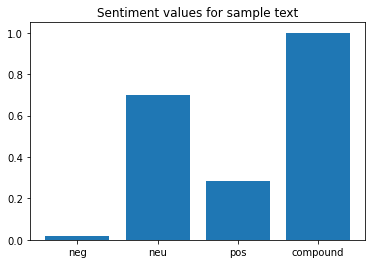

In [30]:
import matplotlib.pyplot as plt

names = list(data_plot.keys())
values = list(data_plot.values())

plt.bar(range(len(data_plot)), values, tick_label=names)
plt.title('Sentiment values for sample text')
 
plt.show()